In [1]:
import os
import numpy as np
from scipy.io import wavfile
from scipy.fft import fft
import librosa


In [22]:
path = "./Documents/all/rice/courses/2022 Fall/ELEC 301"
os.chdir(path)

In [24]:
path = "./project"
os.chdir(path)

In [25]:
path = "./elec-301-speech-emotion-classification/data/data/"
os.chdir(path)

In [26]:
label = [] # Labels of Training Data
raw_data = [] # Different Length
L = [] # Specify Length
E = [] # Energy
ZC = [] # Zero Crossing

for filename in os.listdir():
    fs, data = wavfile.read(filename)
    if len(data.shape) > 1:
        data = data[:,0]
    data = data.astype(float)
    energy = np.inner(data,data)
    label.append(str(filename[: -7]))
    raw_data.append(data)
    L.append(len(data))
    E.append(int(energy))
    zero_crossings = librosa.zero_crossings(data, pad=False)
    ZC.append(sum(zero_crossings))

C:\Users\Weili Fan\AppData\Local\Temp\ipykernel_46928\4244071234.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read(filename)


In [27]:
# print(E)
# print(ZC)
# print(label)

In [28]:
E1 = np.array(E).transpose()
ZC1 = np.array(ZC).transpose()
P = E1 * ZC1
X = np.column_stack([E1, ZC1, P])

In [29]:
Y = [] # New Label
for emo in range(0, len(label)):
    if label[emo] == 'angry':
      Y.append(0)
    if label[emo] == 'calm':
      Y.append(1)
    if label[emo] == 'disgust':
      Y.append(2)
    if label[emo] == 'fearful':
      Y.append(3)
    if label[emo] == 'happy':
      Y.append(4)
    if label[emo] == 'neutral':
      Y.append(5)
    if label[emo] == 'sad':
      Y.append(6)
    if label[emo] == 'surprised':
      Y.append(7)
print(Y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [30]:
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

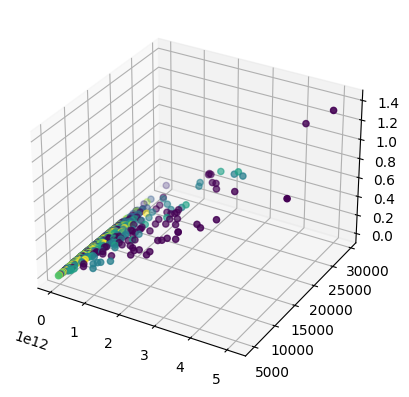

In [31]:
ax = plt.axes(projection ="3d")
ax.scatter3D(X[:,0], X[:,1], X[:,2], c=Y)

In [32]:
lkf = svm.SVC(C=100, kernel='rbf', gamma = 'scale')
lkf.fit(X,Y)
accuracy = accuracy_score(Y, lkf.predict(X))
print(accuracy)

0.26755555555555555


In [33]:
path = "../../test/test"
os.chdir(path)
Et = []
ZCt = []
NUM = []
for filename in os.listdir():
    fs, data = wavfile.read(filename)
    if len(data.shape) > 1:
        data = data[:,0]
    data = data.astype(float)
    energy = np.inner(data,data)
    Et.append(int(energy))
    zero_crossings = librosa.zero_crossings(data, pad=False)
    ZCt.append(sum(zero_crossings))
    NUM.append(str(filename[6: 9]))

C:\Users\Weili Fan\AppData\Local\Temp\ipykernel_46928\2291474973.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read(filename)


In [34]:
E1t = np.array(Et).transpose()
ZC1t = np.array(ZCt).transpose()
P1t = E1t * ZC1t
Xt = np.column_stack([E1t, ZC1t, P1t])
Yt = lkf.predict(Xt)
print(Yt)
print(len(Yt))

[7 1 4 1 0 1 1 2 6 6 1 1 1 1 1 1 0 4 1 1 1 6 1 3 2 1 1 1 1 1 1 7 1 7 6 6 2
 2 7 3 6 1 2 0 7 1 2 6 2 1 7 1 0 1 7 3 2 3 1 0 1 3 1 6 4 6 2 1 1 4 2 4 4 1
 1 7 1 1 1 7 1 2 4 1 2 7 7 1 7 7 0 1 1 3 1 1 1 7 0 2 1 1 1 1 4 6 1 1 0 1 2
 1 1 1 2 1 1 1 1 1 1 3 1 1 1 7 1 1 3 7 3 6 2 4 1 7 0 1 1 4 2 1 1 3 1 1 1 7
 1 4 1 1 1 4 6 1 1 1 7 1 3 4 1 1 7 4 2 3 2 2 1 0 6 1 1 4 1 2 6 0 1 1 1 1 7
 7 7 1 1 1 1 0 1 2 6 4 6 1 1 1 4 3 2 1 1 1 6 1 4 1 1 1 3 6 2 1 7 1 1 6 1 1
 1 6 3 4 7 1 1 4 3 3 1 1 1 1 1 4 7 3 1 1 0 7 1 1 1 1 1 1 3 2 2 1 1 6 7 4 7
 1 2 6 1 0 1 7 2 7 4 6 1 1 4 4 1 1 0 1 1 1 0 1 2 6 6 7 1 3 1 6 2 1 7 3 0 0
 2 2 1 1 7 1 1 3 1 1 1 7 1 1 1 6 6 3 3]
315


In [35]:
res = []
for emo in range(0, len(Yt)):
    if Yt[emo] == 0:
      res.append('angry')
    if Yt[emo] == 1:
      res.append('calm')
    if Yt[emo] == 2:
      res.append('disgust')
    if Yt[emo] == 3:
      res.append('fearful')
    if Yt[emo] == 4:
      res.append('happy')
    if Yt[emo] == 5:
      res.append('neutral')
    if Yt[emo] == 6:
      res.append('sad')
    if Yt[emo] == 7:
      res.append('surprised')
print(NUM)
print(res)

['000', '001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142'

In [36]:
res = np.array(res).transpose()
NUM = np.array(NUM).transpose()
sample = np.column_stack([NUM, res])
sort_sample = sample[sample[:, 0].argsort()]
name = []
for item in sort_sample[:,0]:
  item = 'sample'+str(item)
  name.append(item)
name = np.array(name).transpose()
sort_sample[:,0] = name
sort_sample

array([['sample000', 'surprised'],
       ['sample001', 'calm'],
       ['sample002', 'happy'],
       ['sample003', 'calm'],
       ['sample004', 'angry'],
       ['sample005', 'calm'],
       ['sample006', 'calm'],
       ['sample007', 'disgust'],
       ['sample008', 'sad'],
       ['sample009', 'sad'],
       ['sample010', 'calm'],
       ['sample011', 'calm'],
       ['sample012', 'calm'],
       ['sample013', 'calm'],
       ['sample014', 'calm'],
       ['sample015', 'calm'],
       ['sample016', 'angry'],
       ['sample017', 'happy'],
       ['sample018', 'calm'],
       ['sample019', 'calm'],
       ['sample020', 'calm'],
       ['sample021', 'sad'],
       ['sample022', 'calm'],
       ['sample023', 'fearful'],
       ['sample024', 'disgust'],
       ['sample025', 'calm'],
       ['sample026', 'calm'],
       ['sample027', 'calm'],
       ['sample028', 'calm'],
       ['sample029', 'calm'],
       ['sample030', 'calm'],
       ['sample031', 'surprised'],
       ['sample032',

In [37]:
path = "../../"
os.chdir(path)

In [38]:


import pandas as pd
DF = pd.DataFrame(sort_sample)
DF.columns = ['filename', 'label']
DF.to_csv("energy ZC SVM.csv", index=False)